<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
data = pd.read_csv('../../data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [2]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
plt.hist(data['Insulin'])

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

In [13]:
data['Insulin'].head(20)

0       0
1       0
2       0
3      94
4     168
5       0
6      88
7       0
8     543
9       0
10      0
11      0
12      0
13    846
14    175
15      0
16    230
17      0
18     83
19     96
Name: Insulin, dtype: int64

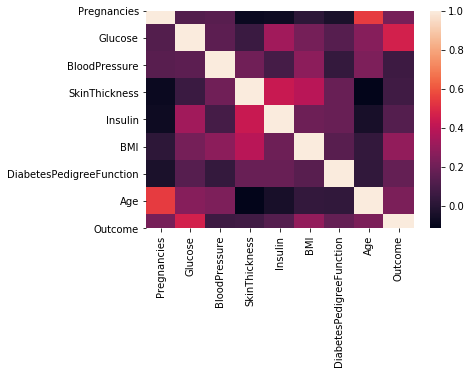

In [15]:
import seaborn as sns
sns.heatmap(data.corr())

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [32]:
from sklearn.model_selection import train_test_split
X = data.drop(['Outcome', 'Insulin'], axis = 1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.7777777777777778
0.765625


/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
# Accuracy score
from sklearn.metrics import accuracy_score
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.7777777777777778
0.765625


In [55]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[115,  12],
       [ 33,  32]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       127
           1       0.73      0.49      0.59        65

    accuracy                           0.77       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.77      0.75       192



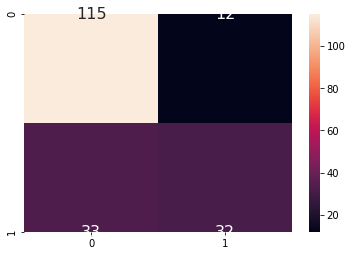

In [60]:
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, annot_kws={"size": 16}, fmt="d")

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [33]:
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(accuracy_score(y_train, clf_train_pred))
print(accuracy_score(y_test, clf_test_pred))

0.78125
0.7760416666666666
0.78125


In [24]:
# SVM confusion matrix
confusion_matrix(y_test, clf_test_pred)

array([[107,  21],
       [ 35,  29]])

In [25]:
print(classification_report(y_test, clf_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       128
           1       0.58      0.45      0.51        64

    accuracy                           0.71       192
   macro avg       0.67      0.64      0.65       192
weighted avg       0.70      0.71      0.70       192



### 4. Naive Bayes
#### 4.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_train_pred = nb.predict(X_train)
nb_test_pred = nb.predict(X_test)
print(nb.score(X_test, y_test))
print(accuracy_score(y_train, nb_train_pred))
print(accuracy_score(y_test, nb_test_pred))

0.7395833333333334
0.7569444444444444
0.7395833333333334


In [36]:
# Naive Bayes confusion matrix
confusion_matrix(y_test, nb_test_pred)

array([[104,  23],
       [ 27,  38]])

In [37]:
print(classification_report(y_test, nb_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       127
           1       0.62      0.58      0.60        65

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.74      0.74      0.74       192



### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [38]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

logreg_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5)
logreg_gs.fit(X_train, y_train)

/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
# Print best parameters
print(logreg_gs.best_params_)
print(logreg_gs.best_score_)

{'C': 1, 'penalty': 'l1'}
0.7638888888888888


In [ ]:
print(logreg_gs.score(X_train, y_train))
print(logreg_gs.score(X_test, y_test))

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [47]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svm_gs = GridSearchCV(svm.SVC(kernel='linear'), svc_params, cv=5)
svm_gs.fit(X_train, y_train)

/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
svm_gs.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [49]:
print(svm_gs.score(X_train, y_train))
print(svm_gs.score(X_test, y_test))

0.7829861111111112
0.7604166666666666


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

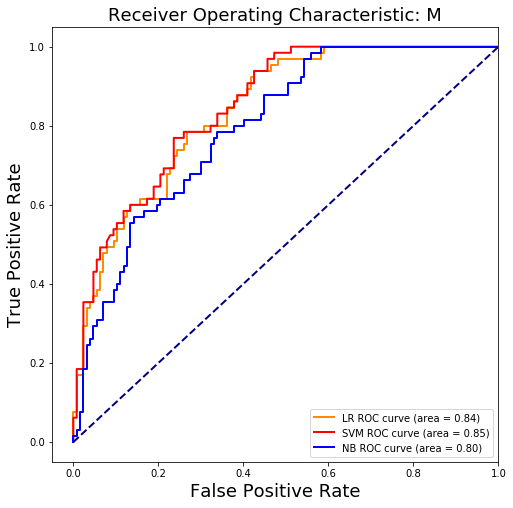

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

test_pred = logreg.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, test_pred)
auc_lr = metrics.auc(fpr_lr, tpr_lr)

clf_test_pred = clf.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, clf_test_pred)
auc_svm = metrics.auc(fpr_svm, tpr_svm)

nb_test_pred = nb.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_test_pred)
auc_nb = metrics.auc(fpr_nb, tpr_nb)



plt.figure(figsize=[8,8])

plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label = 'LR ROC curve (area = %0.2f)' % auc_lr)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label = 'SVM ROC curve (area = %0.2f)' % auc_svm)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label = 'NB ROC curve (area = %0.2f)' % auc_nb)

plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [62]:
# The point is to understand: if training data size increases, when do they arrive at same point, when do they over fit?

In [63]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



